In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.primitives import Estimator, Sampler
from qiskit.quantum_info import SparsePauliOp
import matplotlib.pyplot as plt
from qiskit.circuit.library import EfficientSU2,RealAmplitudes

In [2]:
#classical NN:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [3]:
def train(X_train,y_train,regularization = 0.01,loss_fn = tf.keras.losses.BinaryCrossentropy(),verbose=0):
    n_neurons=100
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(n_neurons, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(regularization )),
        tf.keras.layers.Dense(n_neurons, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(regularization )),
        tf.keras.layers.Dense(n_neurons, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(regularization )),
        tf.keras.layers.Dense(n_neurons, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(regularization )),

        tf.keras.layers.Dense(1, activation='sigmoid'),  
    ])

    model.compile(optimizer="adam",
                  loss=loss_fn,
                 metrics=['BinaryCrossentropy','accuracy'])

    best_model_path="bestmodel"
    save_best_model = tf.keras.callbacks.ModelCheckpoint(best_model_path, monitor='val_loss', 
                                      save_best_only=True, save_weights_only=True)

    history = model.fit(X_train, y_train, validation_split = 0.2 ,epochs=100,callbacks=[save_best_model],verbose=verbose)
    model.load_weights(best_model_path)
    
    return model,history

In [4]:
def compute_band(x,metric="val_loss"):
    arr = []
    for i in range(len(x)):
        #print(x[i].history[metric][-1])
        arr.append(x[i].history[metric])
        
    arr=np.array(arr)
    mean = arr.mean(axis=0)
    std = arr.std(axis=0)
    return mean,std
    

1
init# =  0
finished training info1
finished training info2
finished training info3
finished training info4
init# =  1
finished training info1
finished training info2
finished training info3
finished training info4
init# =  2
finished training info1
finished training info2
finished training info3
finished training info4
init# =  3
finished training info1
finished training info2
finished training info3
finished training info4
init# =  4
finished training info1
finished training info2
finished training info3
finished training info4
init# =  5
finished training info1
finished training info2
finished training info3
finished training info4


<Figure size 432x288 with 0 Axes>

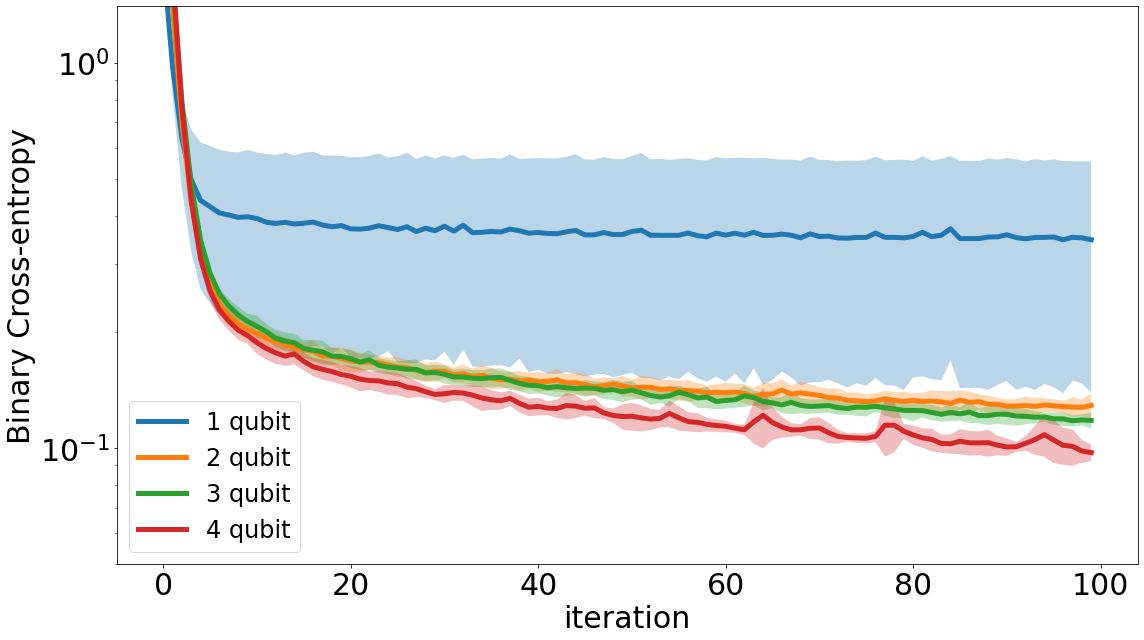

<Figure size 432x288 with 0 Axes>

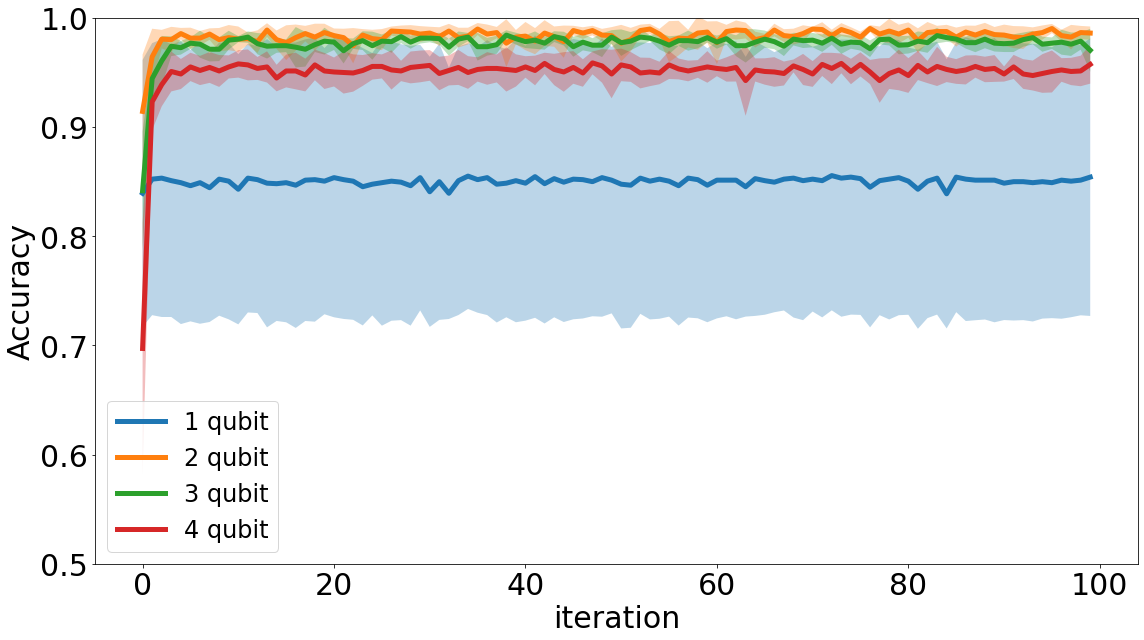

2
init# =  0
finished training info1
finished training info2
finished training info3
finished training info4
init# =  1
finished training info1
finished training info2
finished training info3
finished training info4
init# =  2
finished training info1
finished training info2
finished training info3
finished training info4
init# =  3
finished training info1
finished training info2
finished training info3
finished training info4
init# =  4
finished training info1
finished training info2
finished training info3
finished training info4
init# =  5
finished training info1
finished training info2
finished training info3
finished training info4


<Figure size 432x288 with 0 Axes>

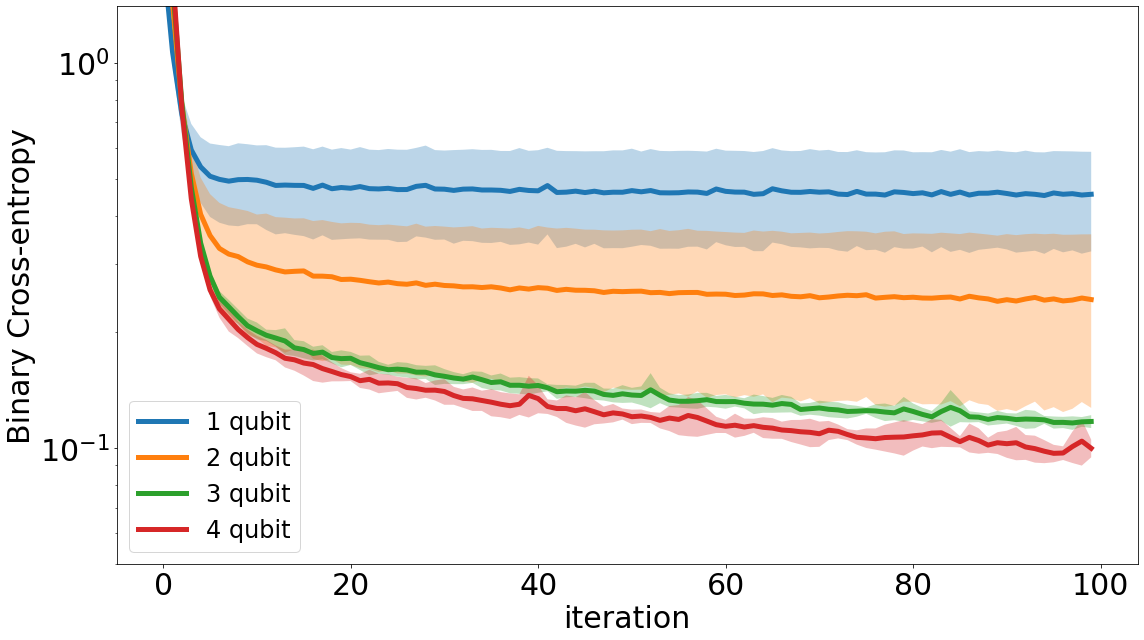

<Figure size 432x288 with 0 Axes>

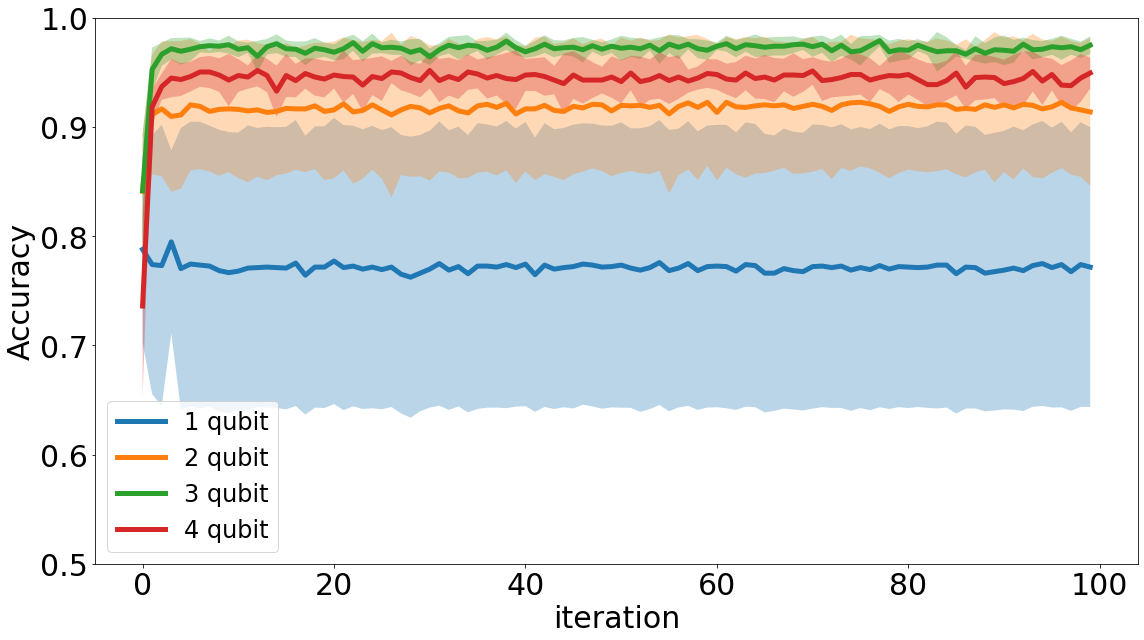

3
init# =  0
finished training info1
finished training info2
finished training info3
finished training info4
init# =  1
finished training info1
finished training info2
finished training info3
finished training info4
init# =  2
finished training info1
finished training info2
finished training info3
finished training info4
init# =  3
finished training info1
finished training info2
finished training info3
finished training info4
init# =  4
finished training info1
finished training info2
finished training info3
finished training info4
init# =  5
finished training info1
finished training info2
finished training info3
finished training info4


<Figure size 432x288 with 0 Axes>

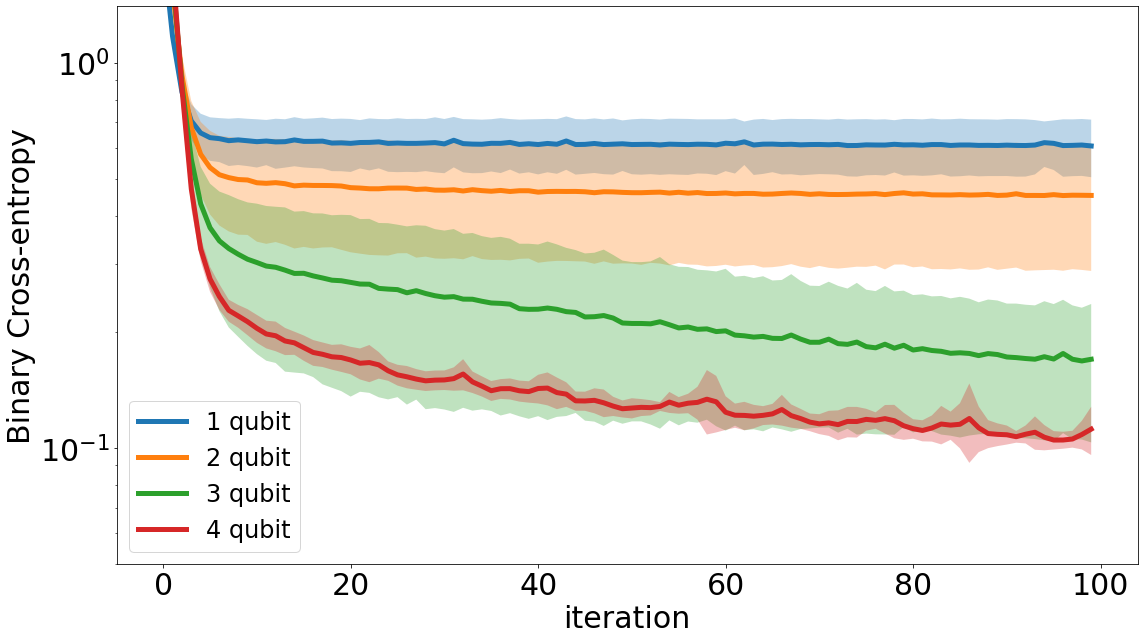

<Figure size 432x288 with 0 Axes>

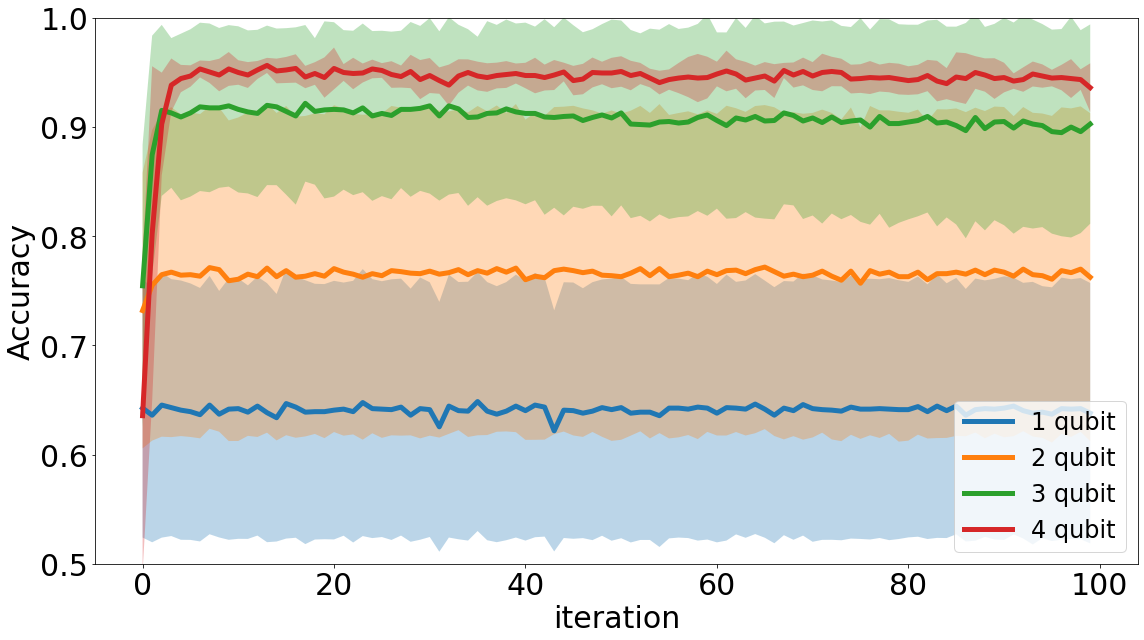

In [7]:
nEvents = 2000

for L in [1,2,3]:
    print(L)

    directory="L{}_dataset".format(L)

    h_all = {'1':[],'2':[],'3':[],'4':[]}

    for init in range(6):
        print("init# = ",init)
        info1_list = np.load(directory+"/info1_list_L{}_init{}.npy".format(L,init))[0:nEvents ,:]
        info2_list = np.load(directory+"/info2_list_L{}_init{}.npy".format(L,init))[0:nEvents ,:]
        info3_list = np.load(directory+"/info3_list_L{}_init{}.npy".format(L,init))[0:nEvents ,:]
        info4_list = np.load(directory+"/info4_list_L{}_init{}.npy".format(L,init))[0:nEvents ,:]
        output_list = np.load(directory+"/output_list_L{}_init{}.npy".format(L,init))[0:nEvents ]

        X_train1, X_test1, y_train1, y_test1 = train_test_split(
               info1_list, output_list, test_size=0.1, random_state=42)

        X_train2, X_test2, y_train2, y_test2 = train_test_split(
               info2_list, output_list, test_size=0.1, random_state=42)
         
        X_train3, X_test3, y_train3, y_test3 = train_test_split(
               info3_list, output_list, test_size=0.1, random_state=42)
         
        X_train4, X_test4, y_train4, y_test4 = train_test_split(
               info4_list, output_list, test_size=0.1, random_state=42)
         


        model1,history1=train(X_train1,y_train1,verbose=0)
        print("finished training info1")
        model2,history2=train(X_train2,y_train2,verbose=0)
        print("finished training info2")
        model3,history3=train(X_train3,y_train3,verbose=0)
        print("finished training info3")
        model4,history4=train(X_train4,y_train4,verbose=0)
        print("finished training info4")

        h_all['1'].append(history1)
        h_all['2'].append(history2)
        h_all['3'].append(history3)
        h_all['4'].append(history4)

    LabelSize=30
    plt.figure(1)
    plt.figure(figsize=(16,9))

    m1,s1 = compute_band(h_all['1'])
    m2,s2 = compute_band(h_all['2'],metric='loss')
    m3,s3 = compute_band(h_all['3'],metric='loss')
    m4,s4 = compute_band(h_all['4'],metric='loss')

    plt.plot(range(len(m1)),m1,'-',label='1 qubit',linewidth=5)
    plt.fill_between(range(len(m1)), m1-s1, m1+s1, alpha=0.3)

    plt.plot(range(len(m2)),m2,'-',label='2 qubit',linewidth=5)
    plt.fill_between(range(len(m2)), m2-s2, m2+s2, alpha=0.3)

    plt.plot(range(len(m3)),m3,'-',label='3 qubit',linewidth=5)
    plt.fill_between(range(len(m3)), m3-s3, m3+s3, alpha=0.3)

    plt.plot(range(len(m4)),m4,'-',label='4 qubit',linewidth=5)
    plt.fill_between(range(len(m4)), m4-s4, m4+s4, alpha=0.3)

    plt.ylim(0.05,1.4)
    plt.yscale('log')
    plt.legend(fontsize=0.8*LabelSize,loc=3)
    plt.xlabel('iteration',fontsize=LabelSize)
    plt.ylabel('Binary Cross-entropy',fontsize=LabelSize)
    plt.tick_params(axis='both', which='major', labelsize=LabelSize)
    plt.tight_layout()
    plt.savefig("validation_loss_L{}".format(L))
    plt.show()
        
    plt.figure(1)
    plt.figure(figsize=(16,9))

    m,s = compute_band(h_all['1'],metric='val_accuracy')
    m2,s2 = compute_band(h_all['2'],metric='val_accuracy')
    m3,s3 = compute_band(h_all['3'],metric='val_accuracy')
    m4,s4 = compute_band(h_all['4'],metric='val_accuracy')


    plt.plot(range(len(m)),m,'-',label='1 qubit',linewidth=5)
    plt.fill_between(range(len(m)), m-s, m+s, alpha=0.3)

    plt.plot(range(len(m2)),m2,'-',label='2 qubit',linewidth=5)
    plt.fill_between(range(len(m2)), m2-s2, m2+s2, alpha=0.3)

    plt.plot(range(len(m3)),m3,'-',label='3 qubit',linewidth=5)
    plt.fill_between(range(len(m3)), m3-s3, m3+s3, alpha=0.3)

    plt.plot(range(len(m4)),m4,'-',label='4 qubit',linewidth=5)
    plt.fill_between(range(len(m4)), m4-s4, m4+s4, alpha=0.3)

    plt.ylim(0.5,1)
    #plt.yscale('log')
    plt.legend(fontsize=0.8*LabelSize)
    plt.xlabel('iteration',fontsize=LabelSize)
    plt.ylabel('Accuracy',fontsize=LabelSize)
    plt.tick_params(axis='both', which='major', labelsize=LabelSize)
    plt.tight_layout()
    plt.savefig("validation_acc_L{}".format(L))
    plt.show()